In [1]:
import cv2



In [2]:
print('hi')

hi


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:

pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2

In [7]:
import tensorflow as tf



In [8]:
import cv2 
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


mkdir car

In [9]:
import cv2 
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout



In [10]:
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir('/Users/kathara/Desktop/Miniproject')

In [11]:
data = []
labels = []
# We have 25 Classes
classes = 25
cur_path = os.getcwd()

In [12]:
cur_path


'/Users/kathara/Desktop/Miniproject'

In [13]:
import numpy as np
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [14]:
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 
# (78418,30,30,3)(78418,)


(270, 30, 30, 3) (270,)


In [15]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
# (62734,30,30,3)(15684,30,30,3)(62734,)(15684,)

(216, 30, 30, 3) (54, 30, 30, 3) (216,) (54,)


In [16]:
y_train = to_categorical(y_train,25) 
y_test = to_categorical(y_test,25)


In [17]:
# os.mkdir('training')

np.save('./Train/data',data)
np.save('./Train/target',labels)

In [18]:
data=np.load('./Train/data.npy')
labels=np.load('./Train/target.npy')

In [19]:
print(data.shape, labels.shape)


(270, 30, 30, 3) (270,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(216, 30, 30, 3) (54, 30, 30, 3) (216,) (54,)


In [22]:
y_train = to_categorical(y_train,26)
y_test = to_categorical(y_test, 26)

In [23]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 25 classes that's why we have defined 43 in the dense
model.add(Dense(26, activation='softmax'))
predictions = (model.predict(X_test) > 0.5).astype("int32")



2022-07-04 23:23:50.363282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 22ms/step


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/20
7/7 [==============================] - 2s 137ms/step - loss: 23.5723 - accuracy: 0.0556 - val_loss: 3.3399 - val_accuracy: 0.0741
Epoch 2/20
7/7 [==============================] - 1s 96ms/step - loss: 3.4565 - accuracy: 0.0741 - val_loss: 3.2319 - val_accuracy: 0.0741
Epoch 3/20
7/7 [==============================] - 1s 98ms/step - loss: 3.2320 - accuracy: 0.0509 - val_loss: 3.2252 - val_accuracy: 0.1111
Epoch 4/20
7/7 [==============================] - 1s 166ms/step - loss: 3.1881 - accuracy: 0.0972 - val_loss: 3.1829 - val_accuracy: 0.1296
Epoch 5/20
7/7 [==============================] - 1s 161ms/step - loss: 3.1194 - accuracy: 0.1620 - val_loss: 3.0870 - val_accuracy: 0.1111
Epoch 6/20
7/7 [==============================] - 1s 141ms/step - loss: 2.9791 - accuracy: 0.1620 - val_loss: 2.9564 - val_accuracy: 0.1296
Epoch 7/20
7/7 [==============================] - 1s 148ms/step - loss: 2.8430 - accuracy: 0.2176 - val_loss: 2.7219 - val_accuracy: 0.2593
Epoch 8/20
7/7 [=====

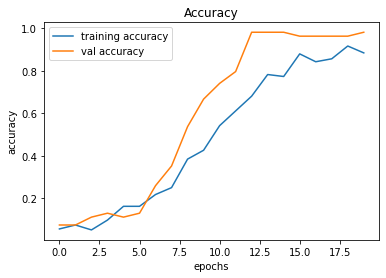

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

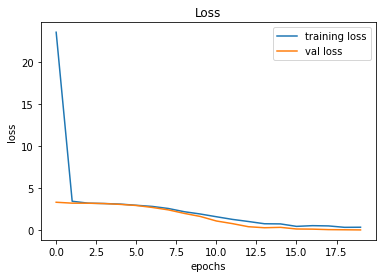

In [26]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [27]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label


In [28]:
model.save("./training/TSR.h5")


In [29]:
X_test, label = testing('Test.csv')


In [30]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")


264/264 [==============================] - 7s 27ms/step


In [31]:
Y_pred

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [32]:
from sklearn.metrics import accuracy_score



In [33]:
Y_pred = np.argmax(model.predict(X_test),axis=1)



264/264 [==============================] - 7s 25ms/step


In [34]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix


In [35]:
 print(accuracy_score(label, Y_pred))


0.02854097584083373


In [36]:
model.save("./training/TSR.h5")


In [37]:
import os
os.chdir('/Users/kathara/Desktop/Miniproject')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [38]:
classes = { 0:'Airbag_hover',
            1:'Brights_hover', 
            2:'checkBattery_hover', 
            3:'checkBrakes_hover', 
            4:'checkBrakes_hover', 
            5:'checkEngine_hover', 
            6:'checkOil_hover', 
            7:'doorOpen_hover', 
            8:'elephantTooting_hover', 
            9:'engineFlood_hover', 
            10:'engineMaintenance_hover', 
            11:'engineOil_hover',

            12:'Exhaust_hover', 
            13:'Gear_temp_hover', 
            14:'Hazard_hover', 
            15:'Lights_hover', 
            16:'Maintenance_hover', 
            17:'overdriveOff_hover', 
            18:'Overheat_hover', 
            19:'Rpm_hover', 
            20:'Skid_hover', 
            21:'tirePressure_hover', 
            22:'warning_hover', 
            23:'wheelLock_hover', 
            24:'wipersOut_hover', 
            25:'Wires_hover'}

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = (model.predict(X_test) > 0.5).astype("int32")
    return image,Y_pred

In [40]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [41]:
from matplotlib import pyplot as plt


1/1 [==============================] - 0s 30ms/step
Predicted sign is:  wipersOut_hover


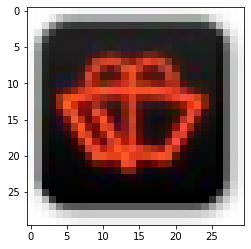

In [44]:
plot,prediction = test_on_img('/Users/kathara/Desktop/Miniproject/Test/07289.png') #numpy.ndarray
s = [str(i) for i in prediction] 
b= " "
a= b.join(s)
print("Predicted sign is: ", classes[i])
plt.imshow(plot)
plt.show()